<a href="https://colab.research.google.com/github/ghoshal7/Supply_Chain_Analytics/blob/master/Supply_Chain_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepare google colab

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 8.0MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Load data

In [0]:
downloaded = drive.CreateFile({'id':'15H9eeU6p7MzIqbz9aQGpQwp4D1bN8lPm'}) 
downloaded.GetContentFile('CASE STUDY_DATA_LATE DELIVERY ROOT CAUSE.xlsx') 

In [116]:
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sb

# Read data
data = pd.read_excel('CASE STUDY_DATA_LATE DELIVERY ROOT CAUSE.xlsx')
data.head()

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
0,E00000001,UNITED KINGDOM,Ground,1,OXFORD,ACCESSORIES,Y,2,NaN,NaN,2016-07-03 03:07:29,2016-07-03 04:09:49,2016-07-06 00:59:42,2016-07-08,2016-07-07,1612,38,3,PASS
1,E00000002,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,N,3,Y,NaN,2016-07-03 00:08:43,2016-07-03 02:16:24,2016-07-03 07:17:04,2016-07-06,2016-07-05,531,8,3,PASS
2,E00000003,FRANCE,Ground,1,ANTWERP,TOPS,Y,3,NaN,NaN,2016-07-03 00:36:00,2016-07-03 02:16:18,2016-07-03 06:16:57,2016-07-06,2016-07-05,504,8,3,PASS
3,E00000004,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,5,NaN,NaN,2016-07-03 00:47:45,2016-07-03 02:16:18,2016-07-03 06:16:55,2016-07-07,2016-07-05,492,8,5,PASS
4,E00000005,UNITED KINGDOM,Next Day,1,OXFORD,JACKETS & VESTS,Y,1,NaN,NaN,2016-07-03 03:52:13,2016-07-03 07:56:33,2016-07-05 08:53:19,2016-07-06,2016-07-06,1567,6,1,PASS


### See data and do initial cleanings

In [117]:
## 
print('size of data = ', np.shape(data))
print('shipping methods = ', data.shipping_method.nunique(), '-->', data.shipping_method.unique())
print('countries = ', data.country.nunique(), '-->', data.country.unique())
print('facility = ', data.facility.nunique(), '-->', data.facility.unique())
print('products = ', data.product_category.nunique(), '-->', data.product_category.unique())

print('*'*20)

print('rows with more than 1 orders = ', data[data.units_per_order != 1].shape[0])

print('To understand:', '\n', 'on_sale VALUES= ', data.on_sale.nunique(),'-->', data.on_sale.unique(), '\n', 
     'returned VALUES = ', data.returned.nunique(), '-->', 'returned = ', data[data.returned == 'Y'].shape[0],'\n',
     'backorder VALUES = ', data.backorder.nunique(), '-->', 'backorder = ', data[data.backorder == 'Y'].shape[0],'\n',
     'passed = ', data[data.delivered_to_plan == 'PASS'].shape[0],'\n',
     'failed = ', data[data.delivered_to_plan == 'FAIL'].shape[0],'\n')

size of data =  (110114, 19)
shipping methods =  4 --> ['Ground' 'Next Day' '3-Day' '2-Day']
countries =  6 --> ['UNITED KINGDOM' 'FRANCE' 'GERMANY' 'SWEDEN' 'BELGIUM' 'NETHERLANDS']
facility =  6 --> ['OXFORD' 'ANTWERP' 'MANCHESTER' 'AUGSBURG' 'HANOVER' 'EINDHOVEN']
products =  3 --> ['ACCESSORIES' 'JACKETS & VESTS' 'TOPS']
********************
rows with more than 1 orders =  2423
To understand: 
 on_sale VALUES=  2 --> ['Y' 'N'] 
 returned VALUES =  1 --> returned =  15391 
 backorder VALUES =  1 --> backorder =  12110 
 passed =  98523 
 failed =  11591 



In [118]:
print(data.returned.unique(), data.backorder.unique(), data.returned.unique(), data.delivered_to_plan.unique())

[nan 'Y'] [nan 'Y'] [nan 'Y'] ['PASS' 'FAIL']


***Hence, wee need to replace nan with 1 (for Yes), 0 (for No), and then check for missing values***

In [119]:
df = data.copy()
df.delivered_to_plan = np.where(df.delivered_to_plan == 'PASS', 1, 0)

for i in ['on_sale', 'returned', 'backorder']:
  print(i)
  df[i] = np.where(df[i]=='Y', 1, 0)

df.head(20)

on_sale
returned
backorder


,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
0,E00000001,UNITED KINGDOM,Ground,1,OXFORD,ACCESSORIES,1,2,0,0,2016-07-03 03:07:29,2016-07-03 04:09:49,2016-07-06 00:59:42,2016-07-08,2016-07-07,1612,38,3,1
1,E00000002,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,0,3,1,0,2016-07-03 00:08:43,2016-07-03 02:16:24,2016-07-03 07:17:04,2016-07-06,2016-07-05,531,8,3,1
2,E00000003,FRANCE,Ground,1,ANTWERP,TOPS,1,3,0,0,2016-07-03 00:36:00,2016-07-03 02:16:18,2016-07-03 06:16:57,2016-07-06,2016-07-05,504,8,3,1
3,E00000004,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,1,5,0,0,2016-07-03 00:47:45,2016-07-03 02:16:18,2016-07-03 06:16:55,2016-07-07,2016-07-05,492,8,5,1
4,E00000005,UNITED KINGDOM,Next Day,1,OXFORD,JACKETS & VESTS,1,1,0,0,2016-07-03 03:52:13,2016-07-03 07:56:33,2016-07-05 08:53:19,2016-07-06,2016-07-06,1567,6,1,1
5,E00000006,UNITED KINGDOM,Ground,1,MANCHESTER,JACKETS & VESTS,1,1,1,0,2016-07-03 04:15:07,2016-07-03 07:56:53,2016-07-04 19:04:46,2016-07-07,2016-07-05,1544,34,2,1
6,E00000007,UNITED KINGDOM,Ground,1,OXFORD,TOPS,0,2,1,0,2016-07-03 04:21:14,2016-07-05 16:44:24,2016-07-06 18:38:55,2016-07-08,2016-07-08,1538,25,5,1
7,E00000008,UNITED KINGDOM,Ground,1,OXFORD,JACKETS & VESTS,1,2,0,0,2016-07-03 04:28:20,2016-07-03 07:46:47,2016-07-05 13:38:41,2016-07-08,2016-07-06,1531,31,2,1
8,E00000009,FRANCE,Ground,1,ANTWERP,TOPS,1,4,0,0,2016-07-03 01:29:43,2016-07-03 03:17:01,2016-07-03 08:16:25,2016-07-06,2016-07-05,450,7,4,1
9,E00000010,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,1,3,0,0,2016-07-03 01:39:28,2016-07-03 04:16:31,2016-07-03 06:17:19,2016-07-06,2016-07-06,440,6,3,1


In [82]:
df.dtypes  ## date time format already done

order_id                          object
country                           object
shipping_method                   object
units_per_order                    int64
facility                          object
product_category                  object
on_sale                            int64
transit_days                       int64
returned                           int64
backorder                          int64
datetime_ordered          datetime64[ns]
datetime_sourced          datetime64[ns]
datetime_product_ready    datetime64[ns]
datetime_planned          datetime64[ns]
datetime_delivered        datetime64[ns]
deadline_source                    int64
deadline_make                      int64
deadline_deliver                   int64
delivered_to_plan                  int64
dtype: object

In [125]:
print(df.datetime_delivered[0] - df.datetime_delivered[1], '\n', 
      df.datetime_ordered[0] - df.datetime_ordered[1], '\n', 
      df.datetime_planned[0] - df.datetime_planned[1], '\n', 
      df.datetime_product_ready[0] - df.datetime_product_ready[1], '\n', 
      df.datetime_sourced[0] - df.datetime_sourced[1])

print('maximum difference b/w order and source = ', '\n', (df.datetime_sourced - df.datetime_ordered).nlargest(500))

2 days 00:00:00 
 0 days 02:58:46 
 2 days 00:00:00 
 2 days 17:42:38 
 0 days 01:53:25
maximum difference b/w order and source =  
 33137    45 days 20:40:27
11894    37 days 02:59:10
1943     35 days 15:07:02
880      34 days 00:25:03
7904     32 days 00:59:23
47004    29 days 19:34:38
33659    24 days 04:06:36
45961    23 days 20:49:01
18631    23 days 19:39:16
50777    23 days 07:42:14
10528    23 days 05:39:34
77731    23 days 03:20:39
46989    22 days 11:03:46
7782     22 days 06:58:15
260      22 days 03:33:09
68893    21 days 21:07:10
55074    21 days 18:31:08
2780     20 days 22:49:04
36356    20 days 09:08:53
51858    20 days 08:12:49
4197     20 days 06:29:56
69793    20 days 05:50:27
73855    19 days 22:16:03
30431    19 days 20:51:29
48133    19 days 16:04:26
35882    19 days 11:54:35
5774     19 days 06:10:14
51630    19 days 04:27:21
15824    19 days 01:04:52
35230    19 days 00:20:57
               ...       
59413     4 days 01:44:40
7339      4 days 01:36:35
7329     

In [0]:
df['date_order'] = df.datetime_ordered.apply(lambda datestamp: datestamp.date()) # date when order is planned
df['date_planned'] = df.datetime_planned.apply(lambda datestamp: datestamp.date()) # date of promise delivery
df['date_delivered'] = df.datetime_delivered.apply(lambda datestamp: datestamp.date()) # date when delivered
df['date_product_ready'] = df.datetime_product_ready.apply(lambda datestamp: datestamp.date()) # 

In [127]:
df[df.delivered_to_plan == 0]

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,...,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan,date_order,date_planned,date_delivered,date_product_ready
42,E00000043,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,1,3,0,0,...,2016-07-05,2016-07-06,86,25,3,0,2016-07-03,2016-07-05,2016-07-06,2016-07-04
44,E00000045,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,0,4,0,0,...,2016-07-06,2016-07-07,64,24,4,0,2016-07-03,2016-07-06,2016-07-07,2016-07-04
50,E00000051,GERMANY,3-Day,1,AUGSBURG,JACKETS & VESTS,1,3,0,0,...,2016-07-08,2016-07-09,3812,70,4,0,2016-07-03,2016-07-08,2016-07-09,2016-07-05
56,E00000057,GERMANY,Ground,1,AUGSBURG,JACKETS & VESTS,1,2,0,0,...,2016-07-07,2016-07-08,3769,71,3,0,2016-07-03,2016-07-07,2016-07-08,2016-07-05
57,E00000058,GERMANY,3-Day,1,AUGSBURG,JACKETS & VESTS,0,3,1,0,...,2016-07-08,2016-07-13,3739,71,4,0,2016-07-03,2016-07-08,2016-07-13,2016-07-05
81,E00000082,GERMANY,Ground,1,EINDHOVEN,TOPS,1,3,0,0,...,2016-07-11,2016-07-12,3627,86,5,0,2016-07-03,2016-07-11,2016-07-12,2016-07-06
90,E00000091,UNITED KINGDOM,Next Day,1,MANCHESTER,TOPS,1,1,0,0,...,2016-07-06,2016-07-07,1382,44,2,0,2016-07-03,2016-07-06,2016-07-07,2016-07-06
91,E00000092,UNITED KINGDOM,Ground,1,MANCHESTER,TOPS,0,2,0,0,...,2016-07-08,2016-07-11,901,26,5,0,2016-07-03,2016-07-08,2016-07-11,2016-07-06
111,E00000112,GERMANY,Ground,1,EINDHOVEN,ACCESSORIES,0,2,0,0,...,2016-07-07,2016-07-08,3520,83,2,0,2016-07-03,2016-07-07,2016-07-08,2016-07-06
117,E00000118,GERMANY,Ground,1,EINDHOVEN,TOPS,1,3,0,0,...,2016-07-08,2016-07-09,3504,82,5,0,2016-07-03,2016-07-08,2016-07-09,2016-07-06


### Feature Engineering - remove NA and outliers

In [72]:
print(np.sum(df.isnull()))

order_id                  0
country                   0
shipping_method           0
units_per_order           0
facility                  0
product_category          0
on_sale                   0
transit_days              0
returned                  0
backorder                 0
datetime_ordered          0
datetime_sourced          0
datetime_product_ready    0
datetime_planned          0
datetime_delivered        0
deadline_source           0
deadline_make             0
deadline_deliver          0
delivered_to_plan         0
dtype: int64


***WOW! No missing values. Let's check potential outliers, if any***

In [73]:
df.describe() # only numeric columns

,units_per_order,on_sale,transit_days,returned,backorder,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
count,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000
mean,1.042329,0.515311,2.381305,0.139773,0.109977,1336.617297,40.581806,3.515829,0.894736
std,0.496093,0.499768,1.113712,0.346753,0.312862,1105.341513,25.320339,1.741056,0.306894
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,479.000000,23.000000,2.000000,1.000000
50%,1.000000,1.000000,2.000000,0.000000,0.000000,1104.000000,32.000000,3.000000,1.000000
75%,1.000000,1.000000,3.000000,0.000000,0.000000,1566.000000,52.000000,5.000000,1.000000
max,50.000000,1.000000,8.000000,1.000000,1.000000,6392.000000,168.000000,14.000000,1.000000


In [80]:
## only units_per_order looks problematic, let's dig deeper

## clearly most orders has only 1 unit
print('1 unit per order accounts = ', (df[df.units_per_order == 1].shape[0]/df.shape[0])*100, 'percents') 

print(df.units_per_order.value_counts())

1 unit per order accounts =  97.79955319033003 percents
1     107691
2       1638
3        409
4        112
5        100
6         59
10        51
7         16
8         10
9          8
20         8
30         2
35         2
50         2
16         1
12         1
11         1
40         1
17         1
19         1
Name: units_per_order, dtype: int64


Text(0.5, 1.0, 'TOPS demands')

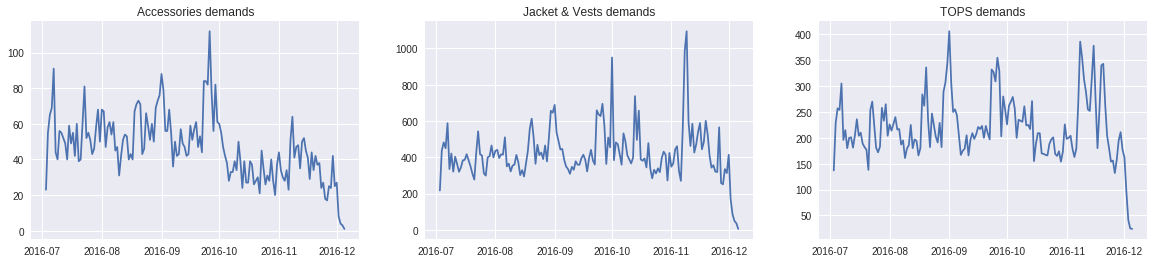

In [149]:
## let's drop them for now!
df1 = df[df.units_per_order == 1]


## Explore the demand - product wise
accessories = df1[df1.product_category=='ACCESSORIES'].groupby(df1.date_order).sum()
jackets = df1[df1.product_category=='JACKETS & VESTS'].groupby(df1.date_order).sum()
tops = df1[df1.product_category=='TOPS'].groupby(df1.date_order).sum()

f,(a,b,c) = plt.subplots(1,3, figsize = (20,4))
a.plot(accessories['units_per_order']); a.set_title('Accessories demands')
b.plot(jackets['units_per_order']); b.set_title('Jacket & Vests demands')
c.plot(tops['units_per_order']); c.set_title('TOPS demands')

Text(0.5, 1.0, 'TOPS demands')

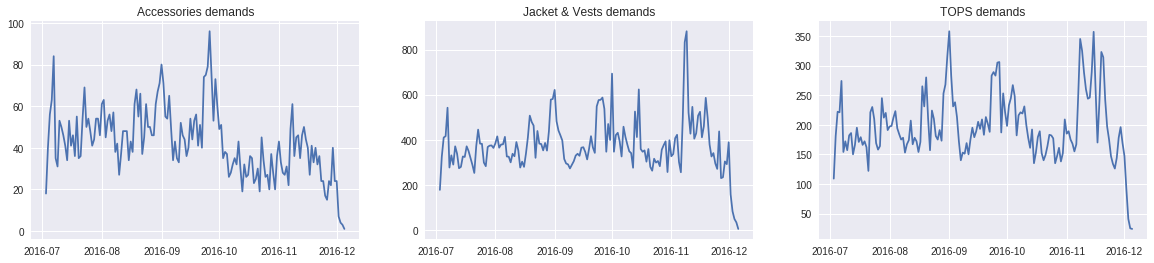

In [152]:
## Explore the PASSED dataset
df1 = df[df.units_per_order == 1]

df1 = df1[df1.delivered_to_plan==1]
## Explore the demand - product wise
accessories = df1[df1.product_category=='ACCESSORIES'].groupby(df1.date_order).sum()
jackets = df1[df1.product_category=='JACKETS & VESTS'].groupby(df1.date_order).sum()
tops = df1[df1.product_category=='TOPS'].groupby(df1.date_order).sum()

f,(a,b,c) = plt.subplots(1,3, figsize = (20,4))
a.plot(accessories['units_per_order']); a.set_title('Accessories demands')
b.plot(jackets['units_per_order']); b.set_title('Jacket & Vests demands')
c.plot(tops['units_per_order']); c.set_title('TOPS demands')

BELGIUM  =  22.5531914893617
FRANCE  =  10.513002124860872
GERMANY  =  10.826347702196747
NETHERLANDS  =  10.59322033898305
SWEDEN  =  9.003751563151313
UNITED KINGDOM  =  9.678932707814102


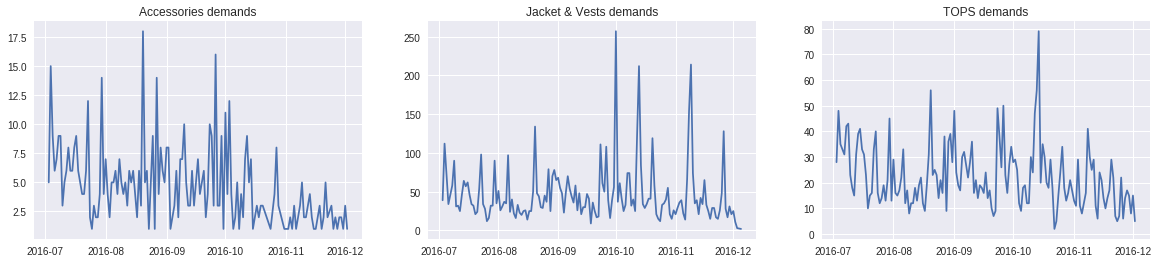

In [169]:
## Explore the FAILED dataset
df1 = df2 = df[df.units_per_order == 1]

df1 = df1[df1.delivered_to_plan==0]
## Explore the demand - product wise
accessories = df1[df1.product_category=='ACCESSORIES'].groupby(df1.date_order).sum()
jackets = df1[df1.product_category=='JACKETS & VESTS'].groupby(df1.date_order).sum()
tops = df1[df1.product_category=='TOPS'].groupby(df1.date_order).sum()

f,(a,b,c) = plt.subplots(1,3, figsize = (20,4))
a.plot(accessories['units_per_order']); a.set_title('Accessories demands')
b.plot(jackets['units_per_order']); b.set_title('Jacket & Vests demands')
c.plot(tops['units_per_order']); c.set_title('TOPS demands')

## Explore locations
failed_order_counts = df1.groupby('country').sum()['units_per_order']
total_order_counts = df2.groupby('country').sum()['units_per_order']
# pd.DataFrame([failed_order_counts, total_order_counts], columns=['Failed', 'Total'])
#print(failed_order_counts, total_order_counts)

countries = ['BELGIUM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'SWEDEN', 'UNITED KINGDOM']
for i,j,k in zip(failed_order_counts, total_order_counts, countries):
  print (k, ' = ', (i/j)*100)

106
1039
6535
50
216
3301
